In [16]:
from DQN_OG import *
import pandas as pd
import torch
import matplotlib.pyplot as plt

In [17]:
n_asset = 2
x = np.arange(1, 101)
state_possible = np.array(np.meshgrid(*([x] * n_asset))).T.reshape(-1, n_asset).astype(np.float32)
state_possible = state_possible[state_possible.sum(axis=1) == 100, :] / 100

In [18]:
x = state_possible[:, 0]
dqn_action_df = pd.DataFrame(index=x)

In [19]:
# RL:
BATCH_SIZE = 1000
GAMMA = 0.9
EPS_START = 0.99999
EPS_END = 0.05
EPS_DECAY = 1000
TAU = 0.005
LR = 1e-4

num_episodes = 20000

mu = np.linspace(50, 200, n_asset) / 1e4
sigma = np.linspace(300, 800, n_asset) / 1e4
cov = np.diag(sigma ** 2)

In [25]:
for tc in [0, 0.0005, 0.001, 0.002]:
    agent = Agent(mu=mu, cov=cov, batch_size=BATCH_SIZE, gamma=GAMMA,
                  eps_start=EPS_START, eps_end=EPS_END, eps_decay=EPS_DECAY, tau=TAU, lr=LR,
                  tc=tc)
    agent.load_models()
    action = []
    for current_state in state_possible:
        current_state = torch.Tensor(current_state)
        # tmp_action = agent.policy_net(current_state)
        optimal_action_index = agent.policy_net(current_state).argmax()
        tmp_action = agent.env.action_space[optimal_action_index]
        action.append(tmp_action[0])  # just store action of first asset

    action = np.array([i.item() for i in action])
    dqn_action_df[f"TC: {tc * 1e4:.0f} bps"] = action

... loading checkpoint ...
... loading checkpoint ...
... loading checkpoint ...
... loading checkpoint ...
... loading checkpoint ...
... loading checkpoint ...
... loading checkpoint ...
... loading checkpoint ...


In [26]:
dqn_action_df

,TC: 0 bps,TC: 5 bps,TC: 10 bps,TC: 20 bps
0.01,0.62,0.65,0.63,0.63
0.02,0.61,0.61,0.61,0.63
0.03,0.61,0.61,0.61,0.63
0.04,0.60,0.61,0.61,0.62
0.05,0.57,0.59,0.60,0.60
...,...,...,...,...
0.95,-0.31,-0.30,-0.31,-0.30
0.96,-0.32,-0.31,-0.32,-0.33
0.97,-0.32,-0.33,-0.32,-0.33
0.98,-0.34,-0.33,-0.34,-0.34


In [27]:
optimal_weight = find_optimal_wgt(mu, cov)
optimal_weight

array([0.63941273, 0.36058727])

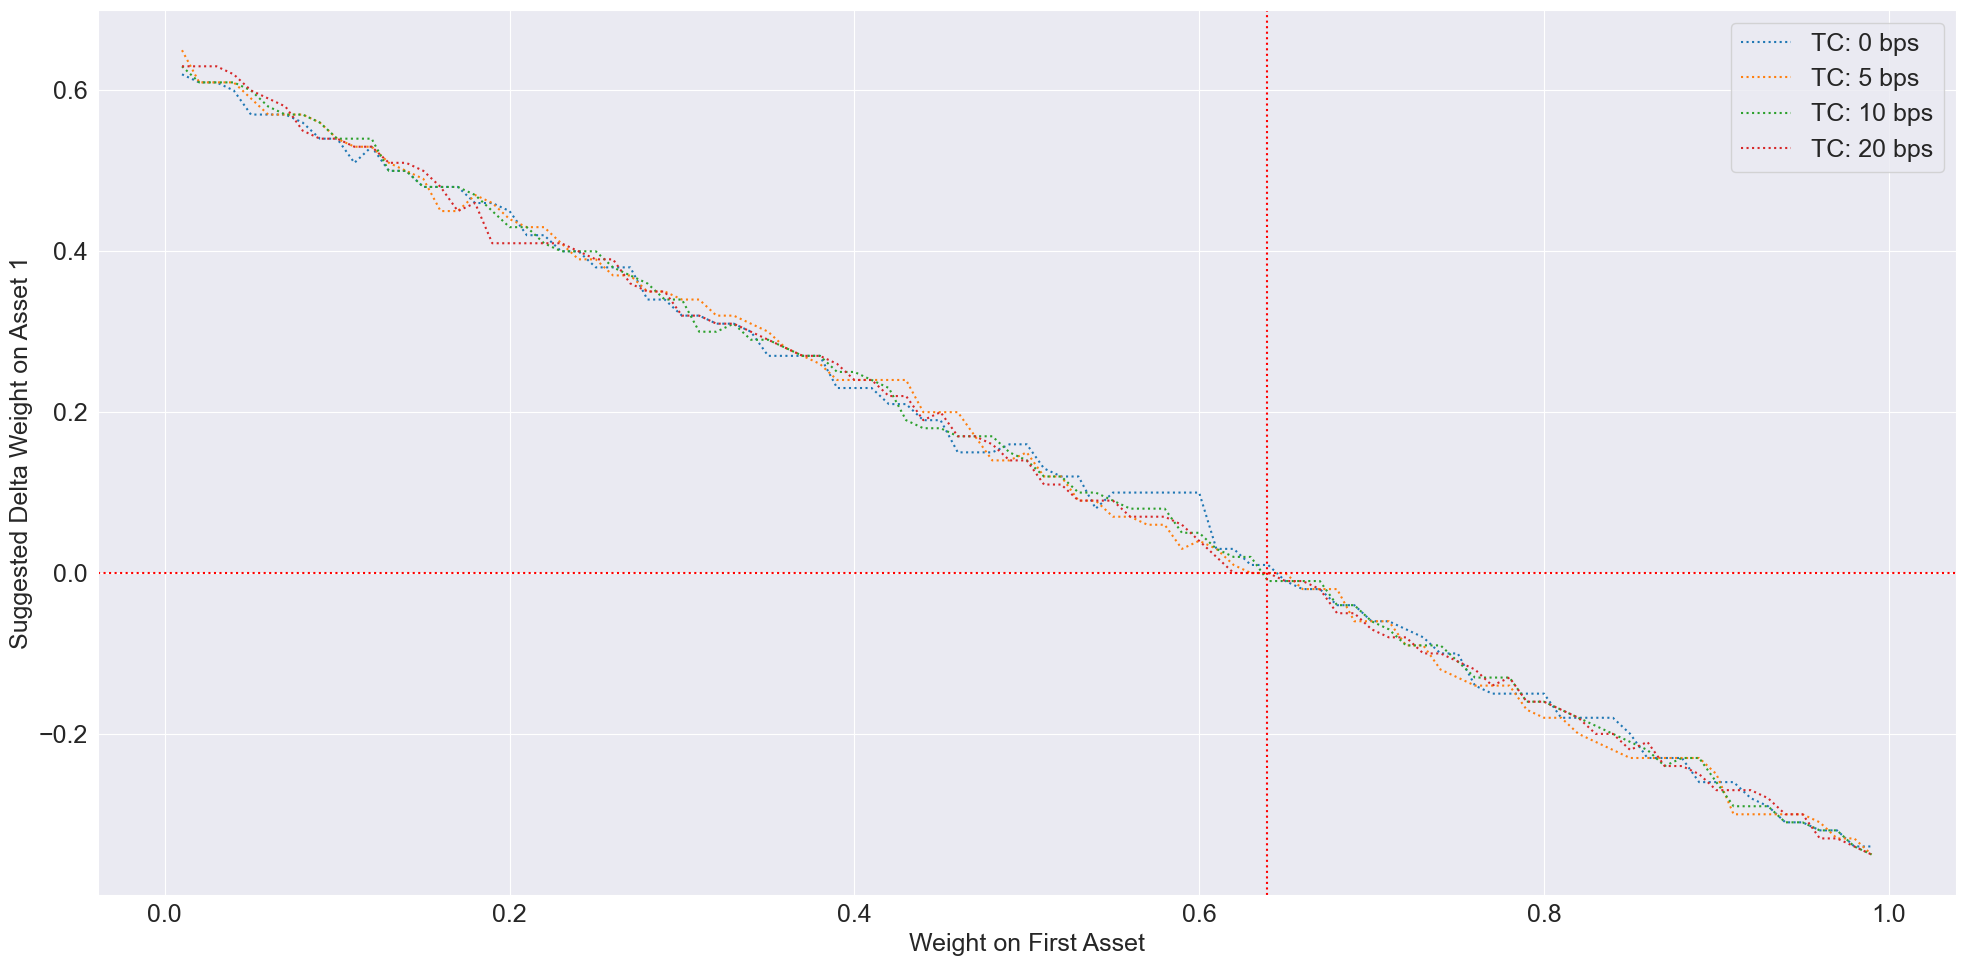

In [29]:
plt.rcParams.update({"font.size": 18})
fig, ax = plt.subplots(1, 1, figsize=(20, 10))
# ql_action_df.plot(ax=ax, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])
# bell_action_df.plot(ax=ax, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'], linestyle="dashed")
dqn_action_df.plot(ax=ax, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'], linestyle="dotted")
ax.set_xlabel("Weight on First Asset")
ax.set_ylabel("Suggested Delta Weight on Asset 1")
ax.axvline(optimal_weight[0], color="red", linestyle="dotted")
ax.axhline(0, color="red", linestyle="dotted")
ax.legend()
plt.tight_layout()
plt.show()